In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import scipy
import math
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
df=pd.read_excel(io='table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')

In [3]:
df=df.drop(df.index[:4])

In [4]:
df=df.drop(df.index[348:])

In [5]:
df.columns=['City','Population','Violent crime','Murder and nonnegligent manslaughter','Rape (revised definition)','Rape (legacy definition)','Robbery','Aggravated assault','Property crime','Burglary','Larceny- theft','Motor vehicle theft','Arson']

In [6]:
display(df.head())

City Population Violent crime  \
4             Adams Village       1861             0   
5  Addison Town and Village       2577             3   
6             Akron Village       2846             3   
7                    Albany      97956           791   
8            Albion Village       6388            23   

  Murder and nonnegligent manslaughter Rape (revised definition)  \
4                                    0                       NaN   
5                                    0                       NaN   
6                                    0                       NaN   
7                                    8                       NaN   
8                                    0                       NaN   

  Rape (legacy definition) Robbery Aggravated assault Property crime Burglary  \
4                        0       0                  0             12        2   
5                        0       0                  3             24        3   
6                        0       0                  3             16        1   
7                       30     227                526           4090      705   
8                        3       4                 16            223       53   

  Larceny- theft Motor vehicle theft Arson  
4             10                   0     0  
5             20                   1     0  
6             15                   0     0  
7           3243                 142   NaN  
8            165                   5   NaN

In [7]:
df['Population']=pd.to_numeric(df['Population'], errors='coerce')
df['Violent crime']=pd.to_numeric(df['Violent crime'], errors='coerce')
df['Murder and nonnegligent manslaughter']=pd.to_numeric(df['Murder and nonnegligent manslaughter'], errors='coerce')
df['Rape (revised definition)']=pd.to_numeric(df['Rape (revised definition)'], errors='coerce')
df['Rape (legacy definition)']=pd.to_numeric(df['Rape (legacy definition)'], errors='coerce')
df['Robbery']=pd.to_numeric(df['Robbery'], errors='coerce')
df['Aggravated assault']=pd.to_numeric(df['Aggravated assault'], errors='coerce')
df['Property crime']=pd.to_numeric(df['Property crime'], errors='coerce')
df['Burglary']=pd.to_numeric(df['Burglary'], errors='coerce')
df['Larceny- theft']=pd.to_numeric(df['Larceny- theft'], errors='coerce')
df['Motor vehicle theft']=pd.to_numeric(df['Motor vehicle theft'], errors='coerce')
df['Arson']=pd.to_numeric(df['Arson'], errors='coerce')

In [8]:
df.dtypes

City                                     object
Population                                int64
Violent crime                             int64
Murder and nonnegligent manslaughter      int64
Rape (revised definition)               float64
Rape (legacy definition)                  int64
Robbery                                   int64
Aggravated assault                        int64
Property crime                            int64
Burglary                                  int64
Larceny- theft                            int64
Motor vehicle theft                       int64
Arson                                   float64
dtype: object

In [9]:
features = pd.DataFrame({'A':[]})
features_2 = pd.DataFrame({'A':[]})

In [10]:
features['population']=df['Population']
features_2['population']=df['Population']

In [11]:
features['pop_squared']=df['Population']**2
features_2['pop_squared']=df['Population']**2

In [12]:
features['murder'] = df['Murder and nonnegligent manslaughter']/df['Population']
features_2['murder'] = df['Murder and nonnegligent manslaughter']

In [13]:
features['robbery'] = df['Robbery']/df['Population']
features_2['robbery'] = df['Robbery']

In [14]:
features = features.drop('A',axis=1)
features_2 = features_2.drop('A',axis=1)

In [15]:
features['larceny']= df['Larceny- theft']/df['Population']
features_2['larceny']= df['Larceny- theft']

In [16]:
features['burglary']= df['Burglary']/df['Population']
features_2['burglary']= df['Burglary']

In [17]:
features['property_crime']= df['Property crime']/df['Population']
features_2['property_crime']= df['Property crime']/df['Population']

In [18]:
features.head()

population  pop_squared  murder  robbery  larceny  burglary  property_crime
4        1861      3463321   0.000    0.000    0.005     0.001           0.006
5        2577      6640929   0.000    0.000    0.008     0.001           0.009
6        2846      8099716   0.000    0.000    0.005     0.000           0.006
7       97956   9595377936   0.000    0.002    0.033     0.007           0.042
8        6388     40806544   0.000    0.001    0.026     0.008           0.035

In [19]:
features_2.head()

population  pop_squared  murder  robbery  larceny  burglary  property_crime
4        1861      3463321       0        0       10         2           0.006
5        2577      6640929       0        0       20         3           0.009
6        2846      8099716       0        0       15         1           0.006
7       97956   9595377936       8      227     3243       705           0.042
8        6388     40806544       0        4      165        53           0.035

In [20]:
#features_2[features_2['population']<8000000]['population'].hist(bins=10)

In [21]:
features_2.sort_values('population', ascending=False)

population     pop_squared  murder  robbery  larceny  burglary  \
220     8396126  70494931807876     335    19170   117931     16606   
39       258789     66971746521      47     1322     8076      3458   
276      210562     44336355844      42      918     6855      2587   
350      199134     39654349956       6      390     1662       470   
314      143834     20688219556      21      400     4298      1781   
11       118296     13993943616       1       31     1882       204   
7         97956      9595377936       8      227     3243       705   
130       96667      9344508889       0       60     1925       332   
271       87204      7604537616       2        9      466        88   
61        80705      6513297025       0       17     1388        99   
218       78800      6209440000       0       81     1172       150   
57        78361      6140446321       0       48     2271       345   
66        78215      6117586225       0       31     1753       186   
210       68071      4633661041       2      228      972       317   
289       66041      4361413681       8      203     1878       769   
325       61686      3805162596       7      102     1997       449   
318       58082      3373518724       1       26      882       190   
344       57559      3313038481       1       28     1134        77   
144       55198      3046819204      10      204      630       206   
156       51506      2652868036       1       51     1049       271   
305       50603      2560663609       0       16      752       219   
319       49898      2489810404       1      145     1305       593   
222       49574      2457581476       3      166     1949       746   
26        46304      2144060416       3      101     1767       525   
138       45535      2073436225       1       12     1012       134   
342       44821      2008922041       1        9      710       166   
131       44787      2005875369       1       16      501        55   
267       43866      1924225956       1       12     1203       125   
338       43777      1916425729       0        3      361       101   
112       43214      1867449796       0       76      698       168   
..          ...             ...     ...      ...      ...       ...   
311        1691         2859481       0        0       39         8   
190        1688         2849344       0        0        0         0   
79         1628         2650384       0        0        8         6   
212        1622         2630884       0        0        0         0   
262        1602         2566404       0        0       31         0   
132        1553         2411809       0        0        0         1   
299        1437         2064969       0        0        0         0   
246        1433         2053489       0        1       12         1   
153        1428         2039184       0        0       11         0   
27         1410         1988100       0        0       12         2   
242        1385         1918225       0        0        8         2   
297        1351         1825201       0        0        8         7   
161        1350         1822500       0        0        2         0   
260        1274         1623076       0        0        0         0   
204        1263         1595169       0        0       15         0   
38         1174         1378276       0        0       10         0   
81         1122         1258884       0        0        6         2   
91         1104         1218816       0        0       60         4   
231        1097         1203409       0        0        1         0   
29         1022         1044484       0        0        2         2   
264         997          994009       0        0        7         1   
52          980          960400       0        0        4         0   
270         977          954529       0        0       27        13   
291         872          760384       0        0        0         0   
348         829          6872

In [22]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y= features['property_crime']#.apply(lambda x: np.log(float(x)))
# per capita
X = features[['population','murder','robbery','larceny','burglary']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [-2.40493710e-11  8.97961915e-01  3.72168065e-01  1.00743899e+00
  1.03505076e+00]

Intercept: 
 8.313580240868965e-05

R-squared:
0.9991184272078656


In [28]:
##### Creating Linear Regression from scratch ####
#Linear Regression Model in its simplest form is 'Y=mX+b',
#were m is the coefficent, and b is the bias coefficient
#in order to find m and b for the equation above, we use Ordinary Least Squares Method
#The way that OLS Method works is by minimizing the distance bewteen point X[i]
#and the line Y.

#the equations used to minize the error:
## m=(sum(1,m,(x[i]-x_mean)*(y[i]-y_mean))/sum(1,m,(x[i]-x_mean)**2))
## b=y_mean-m*x_mean

##### Implementation #####
# first let us define our X and Y
X = df['Burglary'].values
Y = df['Property crime'].values
# now calculate the mean
X_mean = np.mean(X)
Y_mean = np.mean(Y)

# create a variable for length of X and Y
t = len(X)

# intialize variables used in sum
p = 0
q = 0

#use for loop to create equation
for i in range(t):
    p += (X[i] - X_mean) * (Y[i] - Y_mean)
    q += (X[i] - X_mean)**2
m = p/q
b = Y_mean - (m*X_mean)

print(m,b)

8.174721707694095 -185.77631932603174


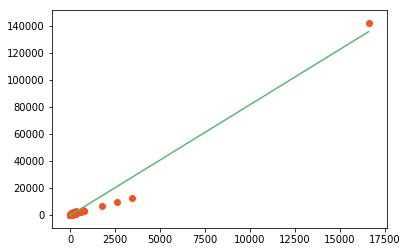

In [29]:
# Ploting Line
x = np.linspace(np.min(X),np.max(X),1000)
y = b + m*x
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

In [30]:
# to evaluate the model appove we need to use the Root Mean Squared Error
# RMSE = sqrt(sum(1,m,(1/m)*(Y_pred[i] - Y[i])**2))

## Implementation
# initialize rmse varaible
rmse = 0
# use for loop to calculate the sum
for i in range(t):
    Y_pred = b + m*X[i]
    rmse += (Y[i] - Y_pred)**2
# now we sqrt rmse/length
rmse = np.sqrt(rmse/t)
print(rmse)

1222.8427195412032


In [31]:
# another was to evaluate is the R**2 score (Coefficient of determination)
# SS_t = sum(1,m,(Y[i] - Y_mean)**2)
# SS_r = sum(1,m,(Y[i] - Y_pred[i])**2)
# R**2 = 1 - (SS_r/SS_t)

## Implementation
# initialize variables
ss_t = 0
ss_r = 0
# use for loop
for i in range(t):
    Y_pred = b + m*X[i]
    ss_t += (Y[i] - Y_mean)**2
    ss_r += (Y[i] - Y_pred)**2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.9744397765128691


In [24]:
# Use a ~ to represent an '=' from the functional form
linear_formula = 'property_crime ~ population+murder+robbery+larceny+burglary'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=features.reset_index()).fit()

In [25]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         property_crime   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.752e+04
Date:                Mon, 22 Oct 2018   Prob (F-statistic):               0.00
Time:                        15:18:51   Log-Likelihood:                 2201.5
No. Observations:                 348   AIC:                            -4391.
Df Residuals:                     342   BIC:                            -4368.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.314e-05   3.92e-05      2.123      0.034    6.11e-06       0.000
population -2.405e-11   5.36e-11     -0.449      0.654   -1.29e-10    8.13e-11
murder         0.8980      0.881      1.020      0.309      -0.834       2.630
robbery        0.3722      0.050      7.374      0.000       0.273       0.471
larceny        1.0074      0.003    381.904      0.000       1.002       1.013
burglary       1.0351      0.013     82.328      0.000       1.010       1.060
==============================================================================
Omnibus:                      258.558   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6947.589
Skew:                           2.729   Prob(JB):                         0.00
Kurtosis:                      24.198   Cond. No.                     1.70e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
lm.pvalues

Intercept    0.034
population   0.654
murder       0.309
robbery      0.000
larceny      0.000
burglary     0.000
dtype: float64

In [27]:
lm.rsquared

0.9991184272078656